2025-05-02 21:28:30,405 - myocr.modeling.model - INFO - model - load - 113 - Onnx model /Users/zhaogang/.MyOCR/models/dbnet++.onnx loaded to cpu,
                    input output info: {'inputs': {'x': {'shape': ['p2o.DynamicDimension.0', 3, 'p2o.DynamicDimension.1', 'p2o.DynamicDimension.2'], 'type': 'tensor(float)'}}, 'outputs': {'sigmoid_0.tmp_0': {'shape': ['p2o.DynamicDimension.3', 1, 'p2o.DynamicDimension.4', 'p2o.DynamicDimension.5'], 'type': 'tensor(float)'}}}
2025-05-02 21:28:30,423 - myocr.modeling.model - INFO - model - load - 113 - Onnx model /Users/zhaogang/.MyOCR/models/cls.onnx loaded to cpu,
                    input output info: {'inputs': {'x': {'shape': ['p2o.DynamicDimension.0', 3, 'p2o.DynamicDimension.1', 'p2o.DynamicDimension.2'], 'type': 'tensor(float)'}}, 'outputs': {'softmax_0.tmp_0': {'shape': ['p2o.DynamicDimension.3', 2], 'type': 'tensor(float)'}}}
2025-05-02 21:28:30,482 - myocr.modeling.model - INFO - model - load - 113 - Onnx model /Users/zhaogang/.MyOCR

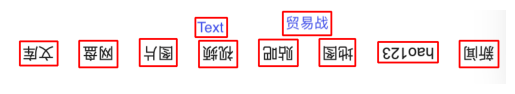

In [1]:

import time

import torch
from myocr.config import MODEL_PATH
from myocr.modeling.model import ModelZoo
from myocr.processors import TextDetectionProcessor, TextDirectionProcessor, TextRecognitionProcessor
from myocr.base import Predictor
import cv2
import matplotlib.pyplot as plt
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"

dec = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", device)
model = ModelZoo.load_model("onnx", MODEL_PATH+"cls.onnx", device)
rec_model = ModelZoo.load_model("onnx", MODEL_PATH+"rec.onnx", device)

orig_image = cv2.imread("../tests/images/test_ocr2.png")
start_time = time.time()
dec_predictor = Predictor(dec,TextDetectionProcessor(dec.device))
detected = dec_predictor.predict(orig_image)
if not detected:
    print("Nothing detected")
else:
    p = Predictor(model, TextDirectionProcessor())
    rec = p.predict(detected)
    p_rec = Predictor(rec_model, TextRecognitionProcessor())
    result = p_rec.predict(rec)
    end_time = time.time()
    print(f"time: {end_time - start_time}")
    print(result)
    
for box in detected.bounding_boxes: # type: ignore
    pts = [
        [int(box.left), int(box.top)],       # top-left
        [int(box.right), int(box.top)],      # top-right
        [int(box.right), int(box.bottom)],   # bottom-right
        [int(box.left), int(box.bottom)],    # bottom-left
    ]
    pts = np.array(pts).reshape((-1,2,1))
    cv2.polylines(orig_image, [np.array(pts, dtype=np.int32)], isClosed=True, color=(255, 0, 0), thickness=2)

plt.imshow(orig_image)
plt.axis("off")
plt.show()